# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
#cut_rule=[zip(range(25000,260000,10000))),float('inf')]
#cut_rule.append(float('inf'))
#cut_rule.append(inf)
cut_rule=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,1000000000]

In [25]:
app_train["NEW_AMT_INCOME_TOTAL"] = pd.cut(app_train["AMT_INCOME_TOTAL"], cut_rule)
app_train["NEW_AMT_INCOME_TOTAL"].value_counts().sort_index()

(0, 25000]                  0
(25000, 50000]           4517
(50000, 75000]          19375
(75000, 100000]         39806
(100000, 125000]        43701
(125000, 150000]        47890
(150000, 175000]        34663
(175000, 200000]        29644
(200000, 225000]        40797
(225000, 250000]         7340
(250000, 1000000000]    39778
Name: NEW_AMT_INCOME_TOTAL, dtype: int64

In [29]:
app_train["NEW_AMT_INCOME_TOTAL"].head(10)

0        (200000, 225000]
1    (250000, 1000000000]
2          (50000, 75000]
3        (125000, 150000]
4        (100000, 125000]
5         (75000, 100000]
6        (150000, 175000]
7    (250000, 1000000000]
8        (100000, 125000]
9        (125000, 150000]
Name: NEW_AMT_INCOME_TOTAL, dtype: category
Categories (11, interval[int64]): [(0, 25000] < (25000, 50000] < (50000, 75000] < (75000, 100000] ... (175000, 200000] < (200000, 225000] < (225000, 250000] < (250000, 1000000000]]

In [35]:
income_groups = app_train.groupby('NEW_AMT_INCOME_TOTAL').mean()
income_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
NEW_AMT_INCOME_TOTAL,,,,,,,,,,,,,,,,,,,,,
"(0, 25000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(25000, 50000]",273728.492805,0.075935,0.082134,0.141466,0.666371,0.301749,43016.868689,294668.663272,14228.968120,262813.662783,...,0.000221,0.000000,0.000443,0.007473,0.004599,0.028744,0.134234,0.207243,1.464214,0.561213
"(50000, 75000]",277740.896465,0.078761,0.121910,0.171871,0.685368,0.376000,65224.720693,343394.305548,16490.656103,306044.412629,...,0.000258,0.000361,0.000258,0.005700,0.005828,0.032535,0.158384,0.221852,1.584924,0.376671
"(75000, 100000]",278246.834146,0.084309,0.119806,0.215621,0.690223,0.407878,88306.472831,419047.656082,19574.954326,373709.375239,...,0.000402,0.000553,0.000201,0.005311,0.006850,0.031200,0.189192,0.243626,1.717872,0.256092
"(100000, 125000]",278226.258324,0.087893,0.106336,0.262282,0.692410,0.404659,112647.721528,484491.591268,22311.297384,432022.738980,...,0.000412,0.000412,0.000343,0.006009,0.005982,0.032362,0.220070,0.254453,1.841422,0.202513
"(125000, 150000]",278016.727856,0.084631,0.096450,0.315828,0.690520,0.416392,135118.070310,552708.800679,25165.972937,493654.554352,...,0.000543,0.000459,0.000501,0.006904,0.006952,0.033428,0.252719,0.260228,1.911392,0.168532
"(150000, 175000]",278397.235871,0.085913,0.080374,0.342584,0.701901,0.411678,159262.668422,608370.151069,27403.076529,544268.036327,...,0.000635,0.000548,0.000462,0.006917,0.006818,0.035212,0.266774,0.281037,1.984189,0.154834
"(175000, 200000]",278048.716131,0.082782,0.080252,0.401228,0.687627,0.432094,181298.054515,664787.874511,29775.408359,596670.148598,...,0.000675,0.000641,0.000573,0.006502,0.007611,0.036524,0.293418,0.281524,1.986767,0.126569
"(200000, 225000]",278687.653651,0.078486,0.081428,0.431845,0.701277,0.431527,214913.983876,722638.580521,32250.036954,651059.758296,...,0.000760,0.000539,0.000196,0.006717,0.007076,0.036874,0.314675,0.280841,2.035160,0.117729


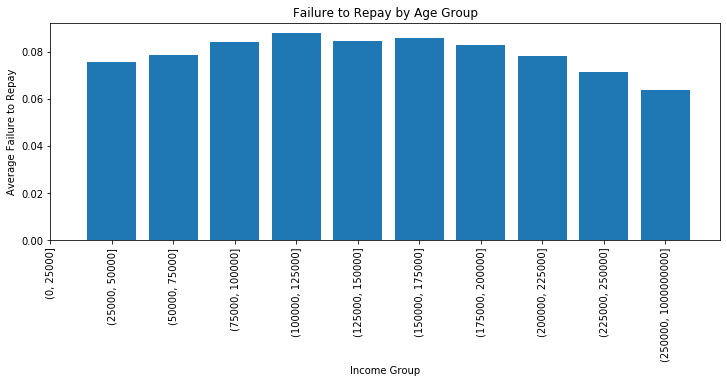

In [42]:
plt.figure(figsize = (12, 4))

# 繪製目標值平均與分組組別的長條圖
plt.bar(range(len(income_groups.index)), income_groups['TARGET'])
# 加上 X, y 座標說明, 以及圖表的標題
plt.xticks(range(len(income_groups.index)), age_groups.index, rotation = 90); plt.xlabel('Income Group'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Age Group');

income 多的客戶族群的違約遲繳的可能性似乎越小！